In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load data
dt = pd.read_csv("/content/drive/MyDrive/.Tugas Akhir/TA2_coding/New folder/csv_all_normalisasi/x3_dimas.csv",sep=";")

In [3]:
dt

,RIGHT_ANKLE_DEGREE1,RIGHT_ANKLE_VEL1,RIGHT_FASE1,LEFT_ANKLE_DEGREE1,LEFT_ANKLE_VEL1,LEFT_FASE1
0,9.1300,17.700,1,-3.3000,0.000,1
1,9.2776,15.756,1,-2.8563,13.311,1
2,9.4252,13.812,1,-2.4126,26.622,1
3,9.5104,10.428,1,-1.9689,39.933,1
4,9.3772,2.004,1,-1.8132,37.260,1
...,...,...,...,...,...,...
298,8.5772,36.900,4,-7.5180,-61.764,4
299,8.9804,34.200,4,-8.3135,-63.873,4
300,9.3108,31.416,4,-8.5890,-48.900,4
301,9.6204,28.608,4,-8.6445,-26.700,4


In [4]:
# Drop the first row
#dt.drop(index=0, inplace=True)

In [5]:
dt

,RIGHT_ANKLE_DEGREE1,RIGHT_ANKLE_VEL1,RIGHT_FASE1,LEFT_ANKLE_DEGREE1,LEFT_ANKLE_VEL1,LEFT_FASE1
0,9.1300,17.700,1,-3.3000,0.000,1
1,9.2776,15.756,1,-2.8563,13.311,1
2,9.4252,13.812,1,-2.4126,26.622,1
3,9.5104,10.428,1,-1.9689,39.933,1
4,9.3772,2.004,1,-1.8132,37.260,1
...,...,...,...,...,...,...
298,8.5772,36.900,4,-7.5180,-61.764,4
299,8.9804,34.200,4,-8.3135,-63.873,4
300,9.3108,31.416,4,-8.5890,-48.900,4
301,9.6204,28.608,4,-8.6445,-26.700,4


In [6]:
# Extract features and target
df = dt[['RIGHT_ANKLE_DEGREE1', 'RIGHT_ANKLE_VEL1', 'RIGHT_FASE1', 'LEFT_ANKLE_DEGREE1', 'LEFT_ANKLE_VEL1', 'LEFT_FASE1']]

In [7]:
df

,RIGHT_ANKLE_DEGREE1,RIGHT_ANKLE_VEL1,RIGHT_FASE1,LEFT_ANKLE_DEGREE1,LEFT_ANKLE_VEL1,LEFT_FASE1
0,9.1300,17.700,1,-3.3000,0.000,1
1,9.2776,15.756,1,-2.8563,13.311,1
2,9.4252,13.812,1,-2.4126,26.622,1
3,9.5104,10.428,1,-1.9689,39.933,1
4,9.3772,2.004,1,-1.8132,37.260,1
...,...,...,...,...,...,...
298,8.5772,36.900,4,-7.5180,-61.764,4
299,8.9804,34.200,4,-8.3135,-63.873,4
300,9.3108,31.416,4,-8.5890,-48.900,4
301,9.6204,28.608,4,-8.6445,-26.700,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RIGHT_ANKLE_DEGREE1  303 non-null    float64
 1   RIGHT_ANKLE_VEL1     303 non-null    float64
 2   RIGHT_FASE1          303 non-null    int64  
 3   LEFT_ANKLE_DEGREE1   303 non-null    float64
 4   LEFT_ANKLE_VEL1      303 non-null    float64
 5   LEFT_FASE1           303 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 14.3 KB


In [9]:
print("data shape : ", df.shape)

data shape :  (303, 6)


In [10]:
df.describe()

,RIGHT_ANKLE_DEGREE1,RIGHT_ANKLE_VEL1,RIGHT_FASE1,LEFT_ANKLE_DEGREE1,LEFT_ANKLE_VEL1,LEFT_FASE1
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-1.099123,0.045267,2.438944,-0.244534,-1.337465,2.363036
std,6.930400,39.224337,1.033576,3.758533,24.522640,1.220772
min,-14.008000,-105.228000,1.000000,-8.700000,-63.984000,1.000000
25%,-7.572000,-34.188000,2.000000,-3.290000,-13.006500,1.000000
50%,-1.100000,4.560000,3.000000,0.720000,-0.540000,2.000000
75%,5.337600,30.600000,3.000000,2.952600,14.095500,4.000000
max,9.930000,96.060000,4.000000,4.479000,59.508000,4.000000


In [11]:
#df.RIGHT.value_counts()

In [12]:
#df.isnull().sum()

In [13]:
df.corr()

,RIGHT_ANKLE_DEGREE1,RIGHT_ANKLE_VEL1,RIGHT_FASE1,LEFT_ANKLE_DEGREE1,LEFT_ANKLE_VEL1,LEFT_FASE1
RIGHT_ANKLE_DEGREE1,1.000000,0.098526,-0.065959,-0.756413,-0.200388,0.133028
RIGHT_ANKLE_VEL1,0.098526,1.000000,0.610956,0.029582,-0.583821,0.686295
RIGHT_FASE1,-0.065959,0.610956,1.000000,0.082552,-0.741796,0.878401
LEFT_ANKLE_DEGREE1,-0.756413,0.029582,0.082552,1.000000,0.189301,0.040362
LEFT_ANKLE_VEL1,-0.200388,-0.583821,-0.741796,0.189301,1.000000,-0.767351
LEFT_FASE1,0.133028,0.686295,0.878401,0.040362,-0.767351,1.000000


<Axes: >

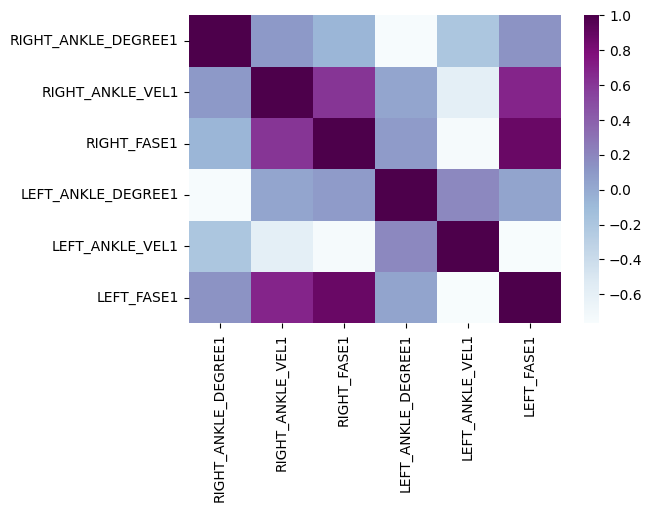

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap="BuPu")

In [15]:
# Extract features and target
x = df[['RIGHT_ANKLE_DEGREE1','RIGHT_ANKLE_VEL1']]
y = df[['RIGHT_FASE1']]

print("x = ",x.shape)
print("y = ",y.shape)

x =  (303, 2)
y =  (303, 1)


In [16]:
x

,RIGHT_ANKLE_DEGREE1,RIGHT_ANKLE_VEL1
0,9.1300,17.700
1,9.2776,15.756
2,9.4252,13.812
3,9.5104,10.428
4,9.3772,2.004
...,...,...
298,8.5772,36.900
299,8.9804,34.200
300,9.3108,31.416
301,9.6204,28.608


In [17]:
y

,RIGHT_FASE1
0,1
1,1
2,1
3,1
4,1
...,...
298,4
299,4
300,4
301,4


In [18]:
# Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [20]:
# Fit SVM model
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [21]:
# Make predictions
y_pred = clf.predict(x_test)

In [22]:
# Calculate accuracy
CLF_acc = accuracy_score(y_pred, y_test)
print("Accuracy:", CLF_acc)

Accuracy: 0.9180327868852459


In [23]:
# Plot the decision boundary
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [24]:
#df.RIGHT_FASE.value_counts()

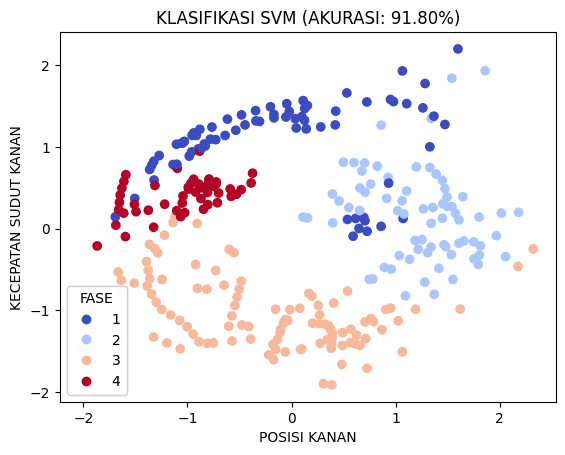

In [25]:
# Plot data points
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y['RIGHT_FASE1'], cmap=plt.cm.coolwarm)
plt.xlabel('POSISI KANAN')
plt.ylabel('KECEPATAN SUDUT KANAN')
plt.title('KLASIFIKASI SVM (AKURASI: {:.2f}%)'.format(CLF_acc*100))
# Add legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="FASE")
plt.gca().add_artist(legend1)

plt.show()
print("accuracy: {:.2f}%".format(CLF_acc * 100))

In [26]:
x1 = df[['LEFT_ANKLE_DEGREE1','LEFT_ANKLE_VEL1']]
y1 = df[['LEFT_FASE1']]

print("x1 = ",x1.shape)
print("y1 = ",y1.shape)

accuracy: 91.80%
x1 =  (303, 2)
y1 =  (303, 1)


In [27]:
x1

,LEFT_ANKLE_DEGREE1,LEFT_ANKLE_VEL1
0,-3.3000,0.000
1,-2.8563,13.311
2,-2.4126,26.622
3,-1.9689,39.933
4,-1.8132,37.260
...,...,...
298,-7.5180,-61.764
299,-8.3135,-63.873
300,-8.5890,-48.900
301,-8.6445,-26.700


In [28]:
y1

,LEFT_FASE1
0,1
1,1
2,1
3,1
4,1
...,...
298,4
299,4
300,4
301,4


In [29]:
# Standardize features
scaler1 = StandardScaler()
x_scaled1 = scaler1.fit_transform(x1)

In [30]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x_scaled1, y1, test_size=0.2, random_state=42)

In [31]:
# Fit SVM model
clf1 = SVC(kernel='linear')
clf1.fit(x1_train, y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [32]:
# Make predictions
y1_pred = clf1.predict(x1_test)

In [33]:
# Calculate accuracy
CLF_acc1 = accuracy_score(y1_pred, y1_test)
print("Accuracy:", CLF_acc1)

Accuracy: 0.7704918032786885


In [34]:
# Plot the decision boundary
pca1 = PCA(n_components=2)
x1_pca = pca1.fit_transform(x_scaled1)

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [35]:
#df.LEFT_FASE.value_counts()

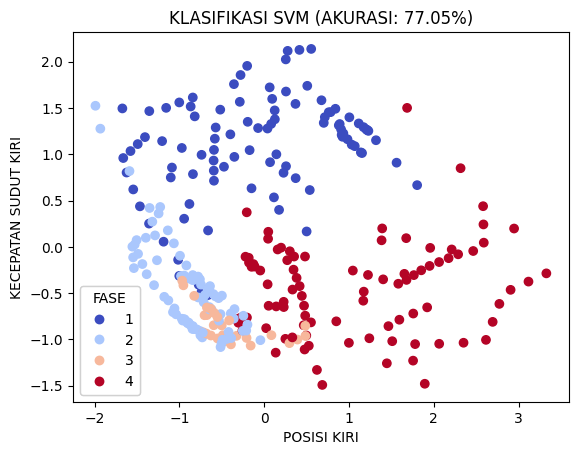

accuracy: 77.05%


In [36]:
# Plot data points
scatter1 = plt.scatter(x1_pca[:, 0], x1_pca[:, 1], c=y1['LEFT_FASE1'], cmap=plt.cm.coolwarm)
plt.xlabel('POSISI KIRI')
plt.ylabel('KECEPATAN SUDUT KIRI')
plt.title('KLASIFIKASI SVM (AKURASI: {:.2f}%)'.format(CLF_acc1*100))

# Add legend
legend1 = plt.legend(*scatter1.legend_elements(),
                    loc="lower left", title="FASE")
plt.gca().add_artist(legend1)

plt.show()
print("accuracy: {:.2f}%".format(CLF_acc1 * 100))

In [37]:
RIGHT_ANKLE_DEGREE = df[['RIGHT_ANKLE_DEGREE1']]
RIGHT_ANKLE_VELOCITY = df[['RIGHT_ANKLE_VEL1']]
RIGHT_PHASE = df[['RIGHT_FASE1']]

LEFT_ANKLE_DEGREE = df[['LEFT_ANKLE_DEGREE1']]
LEFT_ANKLE_VELOCITY = df[['LEFT_ANKLE_VEL1']]
LEFT_PHASE = df[['LEFT_FASE1']]

In [38]:
def perform_regression(x, y):
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    r_squared = r2_score(y, y_pred)
    return model, r_squared

def calculate_adjusted_r_squared(r_squared, n, k):
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
    return adjusted_r_squared

# Function to perform regression and calculate adjusted R-squared
def perform_regression_with_adjusted_r_squared(x, y):
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    n = len(y)
    k = x.shape[1]
    r_squared = r2_score(y, y_pred)
    adjusted_r_squared = calculate_adjusted_r_squared(r_squared, n, k)
    return model, r_squared, adjusted_r_squared

In [39]:
# 1. RIGHT_ANKLE_DEGREE vs RIGHT_PHASE
model_1, r_squared_1 = perform_regression(RIGHT_ANKLE_DEGREE, RIGHT_PHASE)
print("1. Regression Values for RIGHT_ANKLE_DEGREE vs RIGHT_PHASE:")
print("Coefficients:", model_1.coef_)
print("Intercept:", model_1.intercept_)
print("R-squared: {:.6f}".format(r_squared_1))
print()

# 2. RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE
model_2, r_squared_2 = perform_regression(RIGHT_ANKLE_VELOCITY, RIGHT_PHASE)
print("2. Regression Values for RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE:")
print("Coefficients:", model_2.coef_)
print("Intercept:", model_2.intercept_)
print("R-squared: {:.6f}".format(r_squared_2))
print()

# 3. RIGHT_ANKLE_DEGREE & RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE
x_combined_right = np.hstack((RIGHT_ANKLE_DEGREE, RIGHT_ANKLE_VELOCITY))
model_3, r_squared_3, adjusted_r_squared_3 = perform_regression_with_adjusted_r_squared(x_combined_right, RIGHT_PHASE)
print("3. Regression Values for RIGHT_ANKLE_DEGREE & RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE:")
print("Coefficients:", model_3.coef_)
print("Intercept:", model_3.intercept_)
print("R-squared: {:.6f}".format(r_squared_3))
print("Adjusted R-squared: {:.6f}".format(adjusted_r_squared_3))
print()

# 4. LEFT_ANKLE_DEGREE vs LEFT_PHASE
model_4, r_squared_4 = perform_regression(LEFT_ANKLE_DEGREE, LEFT_PHASE)
print("4. Regression Values for LEFT_ANKLE_DEGREE vs LEFT_PHASE:")
print("Coefficients:", model_4.coef_)
print("Intercept:", model_4.intercept_)
print("R-squared: {:.6f}".format(r_squared_4))
print()

# 5. LEFT_ANKLE_VELOCITY vs LEFT_PHASE
model_5, r_squared_5 = perform_regression(LEFT_ANKLE_VELOCITY, LEFT_PHASE)
print("5. Regression Values for LEFT_ANKLE_VELOCITY vs LEFT_PHASE:")
print("Coefficients:", model_5.coef_)
print("Intercept:", model_5.intercept_)
print("R-squared: {:.6f}".format(r_squared_5))
print()

# 6. LEFT_ANKLE_DEGREE & LEFT_ANKLE_VELOCITY vs LEFT_PHASE
x_combined_left = np.hstack((LEFT_ANKLE_DEGREE, LEFT_ANKLE_VELOCITY))
model_6, r_squared_6, adjusted_r_squared_6 = perform_regression_with_adjusted_r_squared(x_combined_left, LEFT_PHASE)
print("6. Regression Values for LEFT_ANKLE_DEGREE & LEFT_ANKLE_VELOCITY vs LEFT_PHASE:")
print("Coefficients:", model_6.coef_)
print("Intercept:", model_6.intercept_)
print("R-squared: {:.6f}".format(r_squared_6))
print("Adjusted R-squared: {:.6f}".format(adjusted_r_squared_6))
print()

print("accuracy RIGHT SVM: {:.2f}%".format(CLF_acc * 100))
print("accuracy LEFT SVM: {:.2f}%".format(CLF_acc1 * 100))

1. Regression Values for RIGHT_ANKLE_DEGREE vs RIGHT_PHASE:
Coefficients: [[-0.00983696]]
Intercept: [2.42813186]
R-squared: 0.004351

2. Regression Values for RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE:
Coefficients: [[0.01609892]]
Intercept: [2.43821514]
R-squared: 0.373267

3. Regression Values for RIGHT_ANKLE_DEGREE & RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE:
Coefficients: [[-0.01899865  0.01642965]]
Intercept: [2.41731831]
R-squared: 0.389338
Adjusted R-squared: 0.385267

4. Regression Values for LEFT_ANKLE_DEGREE vs LEFT_PHASE:
Coefficients: [[0.01310973]]
Intercept: [2.36624208]
R-squared: 0.001629

5. Regression Values for LEFT_ANKLE_VELOCITY vs LEFT_PHASE:
Coefficients: [[-0.03819986]]
Intercept: [2.31194532]
R-squared: 0.588828

6. Regression Values for LEFT_ANKLE_DEGREE & LEFT_ANKLE_VELOCITY vs LEFT_PHASE:
Coefficients: [[ 0.06253101 -0.04001411]]
Intercept: [2.32480977]
R-squared: 0.624565
Adjusted R-squared: 0.622062

accuracy RIGHT SVM: 91.80%
accuracy LEFT SVM: 77.05%


1. Regression Values for RIGHT_ANKLE_DEGREE vs RIGHT_PHASE:
Coefficients: [[-0.00983696]]
Intercept: [2.42813186]
R-squared: 0.004351


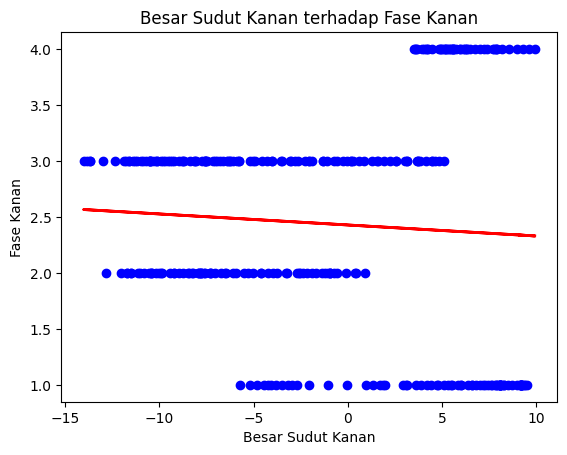


2. Regression Values for RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE:
Coefficients: [[0.01609892]]
Intercept: [2.43821514]
R-squared: 0.373267


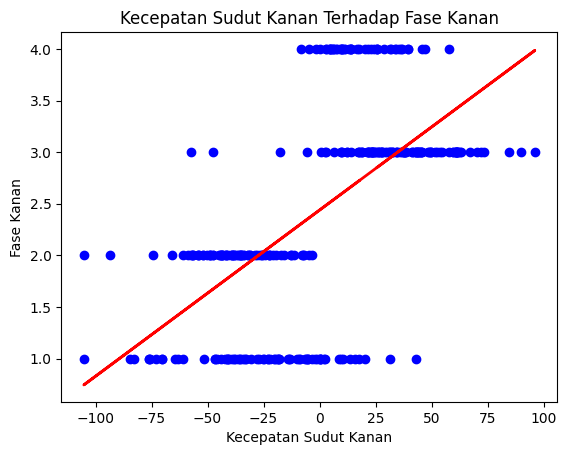


3. Regression Values for RIGHT_ANKLE_DEGREE & RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE:
Coefficients: [[-0.01899865  0.01642965]]
Intercept: [2.41731831]
R-squared: 0.389338
Adjusted R-squared: 0.385267



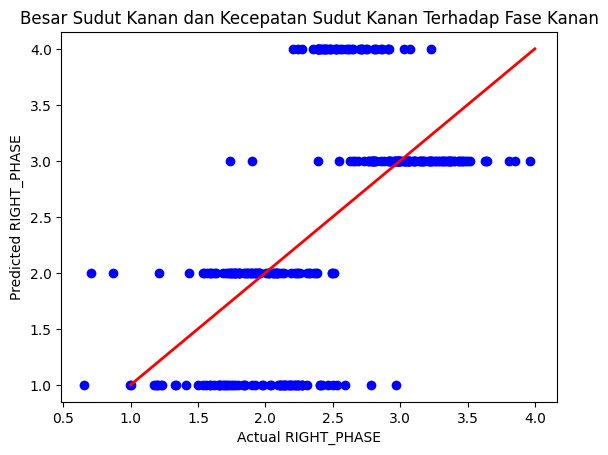

4. Regression Values for LEFT_ANKLE_DEGREE vs LEFT_PHASE:
Coefficients: [[0.01310973]]
Intercept: [2.36624208]
R-squared: 0.001629


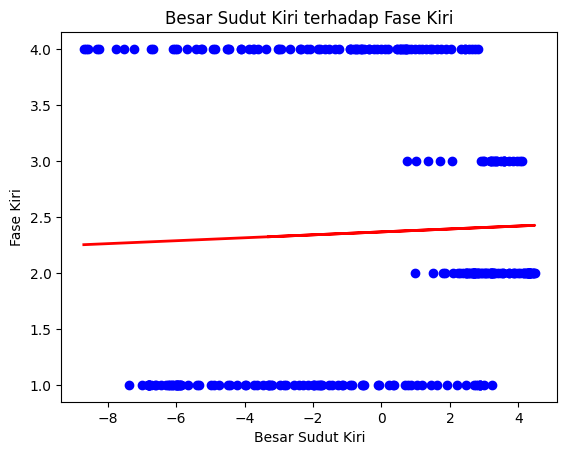


5. Regression Values for LEFT_ANKLE_VELOCITY vs LEFT_PHASE:
Coefficients: [[-0.03819986]]
Intercept: [2.31194532]
R-squared: 0.588828


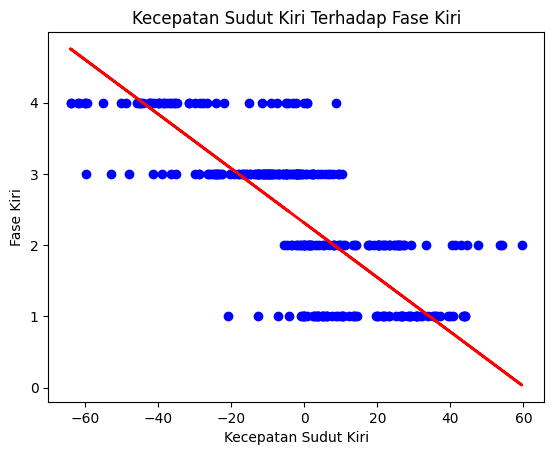


6. Regression Values for LEFT_ANKLE_DEGREE & LEFT_ANKLE_VELOCITY vs LEFT_PHASE:
Coefficients: [[ 0.06253101 -0.04001411]]
Intercept: [2.32480977]
R-squared: 0.624565
Adjusted R-squared: 0.622062



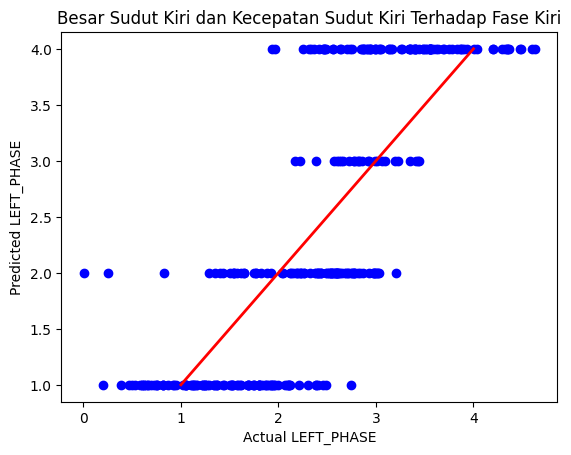

Accuracy RIGHT SVM: 85.00%
Accuracy LEFT SVM: 83.00%


In [40]:
RIGHT_ANKLE_DEGREE = df[['RIGHT_ANKLE_DEGREE1']]
RIGHT_ANKLE_VELOCITY = df[['RIGHT_ANKLE_VEL1']]
RIGHT_PHASE = df[['RIGHT_FASE1']]

LEFT_ANKLE_DEGREE = df[['LEFT_ANKLE_DEGREE1']]
LEFT_ANKLE_VELOCITY = df[['LEFT_ANKLE_VEL1']]
LEFT_PHASE = df[['LEFT_FASE1']]

def perform_regression(x, y):
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    r_squared = r2_score(y, y_pred)
    return model, r_squared, y_pred

def calculate_adjusted_r_squared(r_squared, n, k):
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
    return adjusted_r_squared

# Function to perform regression and calculate adjusted R-squared
def perform_regression_with_adjusted_r_squared(x, y):
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    n = len(y)
    k = x.shape[1]
    r_squared = r2_score(y, y_pred)
    adjusted_r_squared = calculate_adjusted_r_squared(r_squared, n, k)
    return model, r_squared, adjusted_r_squared, y_pred

# 1. RIGHT_ANKLE_DEGREE vs RIGHT_PHASE
model_1, r_squared_1, y_pred_1 = perform_regression(RIGHT_ANKLE_DEGREE, RIGHT_PHASE)
print("1. Regression Values for RIGHT_ANKLE_DEGREE vs RIGHT_PHASE:")
print("Coefficients:", model_1.coef_)
print("Intercept:", model_1.intercept_)
print("R-squared: {:.6f}".format(r_squared_1))
plt.scatter(RIGHT_ANKLE_DEGREE, RIGHT_PHASE, color='blue')
plt.plot(RIGHT_ANKLE_DEGREE, y_pred_1, color='red', linewidth=2)
plt.title("Besar Sudut Kanan terhadap Fase Kanan")
plt.xlabel('Besar Sudut Kanan')
plt.ylabel('Fase Kanan')
plt.show()
print()

# 2. RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE
model_2, r_squared_2, y_pred_2 = perform_regression(RIGHT_ANKLE_VELOCITY, RIGHT_PHASE)
print("2. Regression Values for RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE:")
print("Coefficients:", model_2.coef_)
print("Intercept:", model_2.intercept_)
print("R-squared: {:.6f}".format(r_squared_2))

plt.scatter(RIGHT_ANKLE_VELOCITY, RIGHT_PHASE, color='blue')
plt.plot(RIGHT_ANKLE_VELOCITY, y_pred_2, color='red', linewidth=2)
plt.title("Kecepatan Sudut Kanan Terhadap Fase Kanan")
plt.xlabel('Kecepatan Sudut Kanan')
plt.ylabel('Fase Kanan')
plt.show()
print()

# 3. RIGHT_ANKLE_DEGREE & RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE
x_combined_right = np.hstack((RIGHT_ANKLE_DEGREE, RIGHT_ANKLE_VELOCITY))
model_3, r_squared_3, adjusted_r_squared_3, y_pred_3 = perform_regression_with_adjusted_r_squared(x_combined_right, RIGHT_PHASE)
print("3. Regression Values for RIGHT_ANKLE_DEGREE & RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE:")
print("Coefficients:", model_3.coef_)
print("Intercept:", model_3.intercept_)
print("R-squared: {:.6f}".format(r_squared_3))
print("Adjusted R-squared: {:.6f}".format(adjusted_r_squared_3))
print()

# For combined plots, it's a bit more complex to visualize. You can plot predicted vs actual values:
plt.scatter(y_pred_3, RIGHT_PHASE, color='blue')
plt.plot(RIGHT_PHASE, RIGHT_PHASE, color='red', linewidth=2)  # Line y=x for reference
plt.title("Besar Sudut Kanan dan Kecepatan Sudut Kanan Terhadap Fase Kanan")
plt.xlabel('Actual RIGHT_PHASE')
plt.ylabel('Predicted RIGHT_PHASE')
plt.show()

# 4. LEFT_ANKLE_DEGREE vs LEFT_PHASE
model_4, r_squared_4, y_pred_4 = perform_regression(LEFT_ANKLE_DEGREE, LEFT_PHASE)
print("4. Regression Values for LEFT_ANKLE_DEGREE vs LEFT_PHASE:")
print("Coefficients:", model_4.coef_)
print("Intercept:", model_4.intercept_)
print("R-squared: {:.6f}".format(r_squared_4))

plt.scatter(LEFT_ANKLE_DEGREE, LEFT_PHASE, color='blue')
plt.plot(LEFT_ANKLE_DEGREE, y_pred_4, color='red', linewidth=2)
plt.title("Besar Sudut Kiri terhadap Fase Kiri")
plt.xlabel('Besar Sudut Kiri')
plt.ylabel('Fase Kiri')
plt.show()
print()

# 5. LEFT_ANKLE_VELOCITY vs LEFT_PHASE
model_5, r_squared_5, y_pred_5 = perform_regression(LEFT_ANKLE_VELOCITY, LEFT_PHASE)
print("5. Regression Values for LEFT_ANKLE_VELOCITY vs LEFT_PHASE:")
print("Coefficients:", model_5.coef_)
print("Intercept:", model_5.intercept_)
print("R-squared: {:.6f}".format(r_squared_5))

plt.scatter(LEFT_ANKLE_VELOCITY, RIGHT_PHASE, color='blue')
plt.plot(LEFT_ANKLE_VELOCITY, y_pred_5, color='red', linewidth=2)
plt.title("Kecepatan Sudut Kiri Terhadap Fase Kiri")
plt.xlabel('Kecepatan Sudut Kiri')
plt.ylabel('Fase Kiri')
plt.show()
print()

# 6. LEFT_ANKLE_DEGREE & LEFT_ANKLE_VELOCITY vs LEFT_PHASE
x_combined_left = np.hstack((LEFT_ANKLE_DEGREE, LEFT_ANKLE_VELOCITY))
model_6, r_squared_6, adjusted_r_squared_6, y_pred_6 = perform_regression_with_adjusted_r_squared(x_combined_left, LEFT_PHASE)
print("6. Regression Values for LEFT_ANKLE_DEGREE & LEFT_ANKLE_VELOCITY vs LEFT_PHASE:")
print("Coefficients:", model_6.coef_)
print("Intercept:", model_6.intercept_)
print("R-squared: {:.6f}".format(r_squared_6))
print("Adjusted R-squared: {:.6f}".format(adjusted_r_squared_6))
print()

# For combined plots, again visualizing predicted vs actual:
plt.scatter(y_pred_6, LEFT_PHASE, color='blue')
plt.plot(LEFT_PHASE, LEFT_PHASE, color='red', linewidth=2)  # Line y=x for reference
plt.title("Besar Sudut Kiri dan Kecepatan Sudut Kiri Terhadap Fase Kiri")
plt.xlabel('Actual LEFT_PHASE')
plt.ylabel('Predicted LEFT_PHASE')
plt.show()

# Assuming you have the accuracies from some classification models:
CLF_acc = 0.85  # Replace with actual accuracy value
CLF_acc1 = 0.83  # Replace with actual accuracy value

print("Accuracy RIGHT SVM: {:.2f}%".format(CLF_acc * 100))
print("Accuracy LEFT SVM: {:.2f}%".format(CLF_acc1 * 100))
